## Q1: Create a function to convert RGB to Grey scale image. Use numpy, pytorch, or tf but don't direct available functions.

Hint: Use the formula: Gray = 0.299*R + 0.587*G + 0.114*B for the conversion.

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

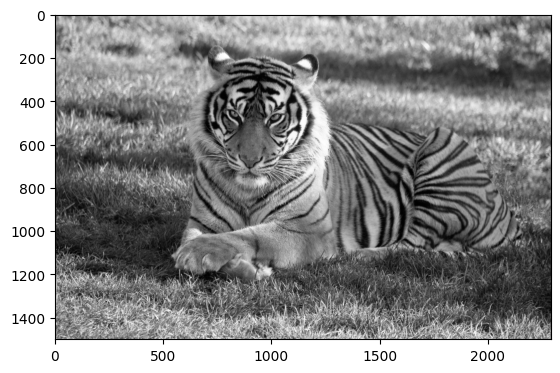

In [41]:
#convert rgb into gray
def conv_to_gray(image):
    gray_image = image[:,:,0] * 0.299 + image[:,:,1] * 0.587 + image[:,:,2] * 0.114
    return gray_image

colorimage = cv2.imread('./common_images/Tiger.jpeg', cv2.COLOR_BGR2RGB)
#rgb_img = cv2.cvtColor(colorimage, cv2.COLOR_BGR2GRAY)
gray_img = conv_to_gray(colorimage)
plt.imshow(rgb_img, cmap='gray')


## Q2 : Create a function to convolve_image taking image, kernel as input and returned convolved image.

Hint :  Easy Pesy - done in the class.

In [69]:
def conv(image, filter):
    rows, cols = image.shape
    k = int(filter.shape[0])
    print(rows, cols, k)
    outputimage = np.zeros((rows-k+1, cols-k+1))
    for i in range(0, int(outputimage.shape[0])):
        for j in range(0, int(outputimage.shape[1])):
            outputimage[i,j] = np.sum(image[i : i+k, j:j+k] * filter)
    return outputimage



In [54]:
filter1 = np.array([[0, 0, 0],
 [0, 1, 0],
 [0, 0, 0]])

result_img = conv(gray_img, filter1)


1500 2292 3


In [55]:
def gaussian_kernel(size: int, sigma: float) -> np.ndarray:

    if size%2 == 0:
        size += 1
    
    # create coordinate grid

    ax = np.linspace(-(size//2), (size//2), size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (xx**2 + yy**2) / sigma**2)
    print(kernel)
    return kernel



In [75]:
kernel = gaussian_kernel(5, 1)
result_img = conv(gray_img, kernel)


[[0.01831564 0.082085   0.13533528 0.082085   0.01831564]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.13533528 0.60653066 1.         0.60653066 0.13533528]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.01831564 0.082085   0.13533528 0.082085   0.01831564]]
1500 2292 5


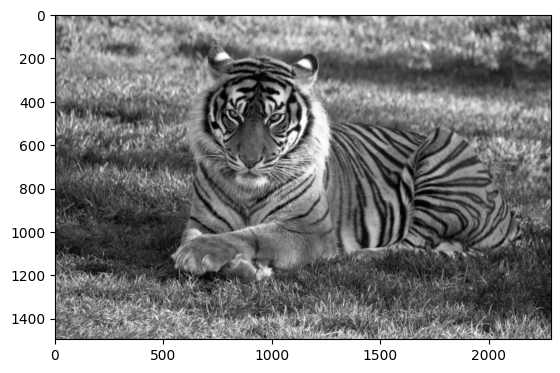

In [76]:
plt.imshow(result_img, cmap='gray')